<a href="https://colab.research.google.com/github/LaimengEung/system-analysis-group-final-project/blob/main/sys_analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub

path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

100%|██████████| 93.9k/93.9k [00:00<00:00, 29.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/9


In [ ]:
%ls {path}

StudentPerformanceFactors.csv


In [ ]:
import pandas as pd

data = pd.read_csv(path + '/StudentPerformanceFactors.csv')

data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Group data into quantitative and qualitative groups

In [ ]:
quan_cols = data.select_dtypes(include='number').columns.tolist()
qual_cols = data.select_dtypes(exclude='number').columns.tolist()


print("Quantitative Columns:", quan_cols)
print("Qualitative Columns:", qual_cols)


Quantitative Columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
Qualitative Columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


In [ ]:
# Study about the missing values
data.isna().sum() * 100 / len(data)

,0
Hours_Studied,0.000000
Attendance,0.000000
Parental_Involvement,0.000000
Access_to_Resources,0.000000
Extracurricular_Activities,0.000000
Sleep_Hours,0.000000
Previous_Scores,0.000000
Motivation_Level,0.000000
Internet_Access,0.000000
Tutoring_Sessions,0.000000


> #### Based on the proportion:

In [ ]:
# Statistical Summary
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


> #### There are minimal outliers

### Then, study for outliers

### Visualize the distribution of each quantitative column

<Axes: xlabel='Attendance', ylabel='Count'>

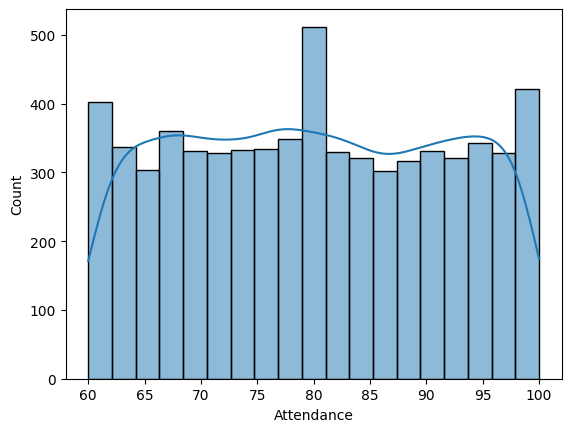

In [ ]:
import seaborn as sns

sns.histplot(data, x='Attendance', kde=True)

<Axes: xlabel='Tutoring_Sessions'>

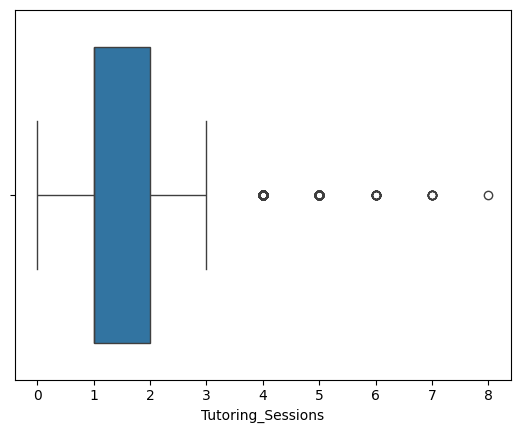

In [ ]:
sns.boxplot(data, x='Tutoring_Sessions')

<Axes: xlabel='Tutoring_Sessions', ylabel='count'>

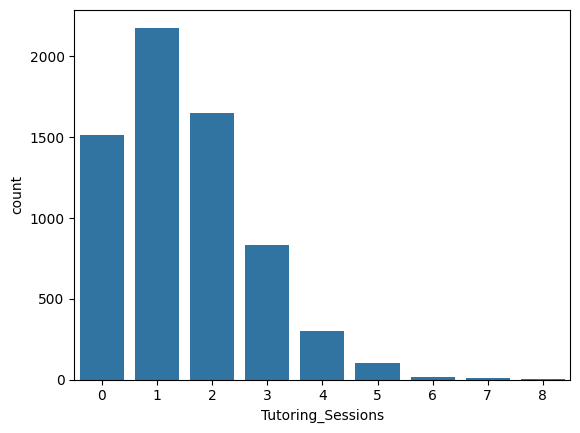

In [ ]:
sns.countplot(data, x='Tutoring_Sessions')

In [ ]:
# Manipulate Tutoring_Sessions to Qualitative
data['Tutoring_Sessions'].astype('object')


,Tutoring_Sessions
0,0
1,2
2,2
3,1
4,3
...,...
6602,1
6603,3
6604,3
6605,2


> #### Study the skewness of `Tutoring_Sessions`

### Visualize the distribution of each qualitative column



<Axes: xlabel='Distance_from_Home', ylabel='count'>

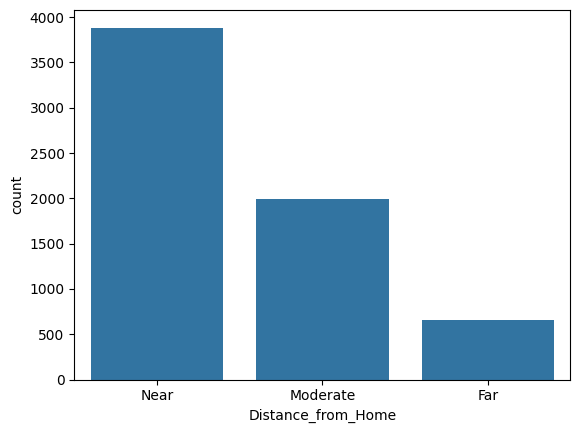

In [ ]:
sns.countplot(data, x='Distance_from_Home')

### Study the relationship between the quantitative data and target feature `exam_score`

<Axes: xlabel='Tutoring_Sessions', ylabel='Exam_Score'>

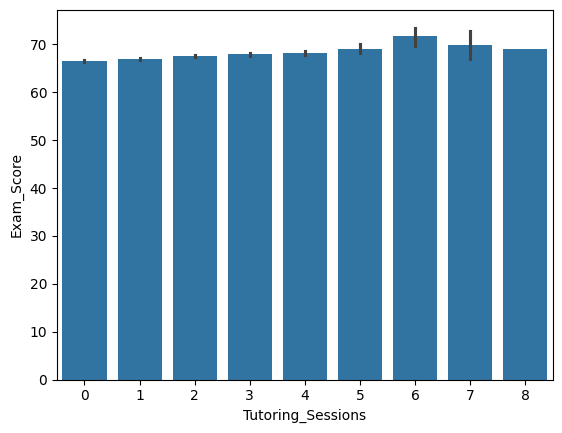

In [ ]:
sns.barplot(data, x='Tutoring_Sessions', y='Exam_Score')

0.17507908702291106


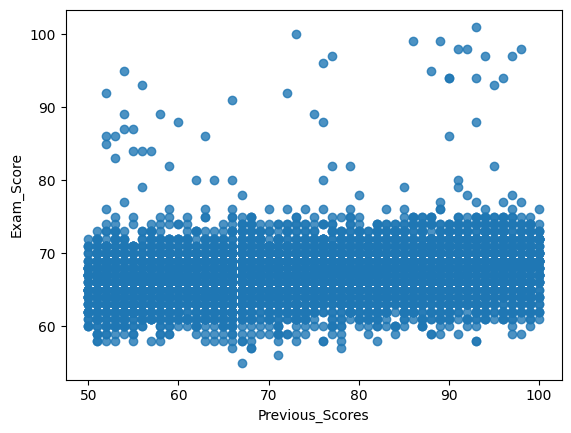

In [ ]:
sns.regplot(data, x='Previous_Scores', y='Exam_Score')

print(data['Previous_Scores'].corr(data['Exam_Score']))

### Study the relationship between the qualitative data and target feature `exam_score`

> #### NOTE: Correlation may be studied using:
>
> - Pearson Correlation Coefficient: quan vs quan
> - Spearman Correlation: qual vs qual
> - Eta-squared (for qualitative and quantitative data): quan vs qual

### Group the correlation